**Homework 1**

In [1]:
# This is the first homework of the course. The homework is about the classification of the data set.
import pandas as pd
import numpy as np   

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import *
import matplotlib.pyplot as pl
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [2]:
# The import from google.colab is to be used in the google colab environment. However, I runned the code in my local machine.
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#In this case I am loading the dataset from the local environment.

#filename= '/content/drive/MyDrive/Machine Learning/Homework 1 Dataset/HW1_datasets_public/dataset1.csv'
dataset_1 = 'dataset1.csv'
dataset_2 = 'dataset2.csv'

In [4]:
# The load_data function is used to load the dataset. The function returns the input and output data. 
# The input data is the first column of the dataset and the output data is the second column of the dataset.
# What it does is to read the csv file and convert it into a pandas dataframe. Then it extracts the first and second columns of the dataframe and converts them into numpy arrays.

def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)

    # Headers' list:
    headers = data.columns # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y




In [18]:
# Step 1: Load data

print('Loading dataset 1...')
X, Y = load_data(dataset_1)
#Print the number of samples and features of the dataset
print('Samples and Features of X' ,X.shape)
print(Y.shape)
#Print the number of labels 
print(np.unique(Y))
print('Loading dataset 2...')
X2, Y2 = load_data(dataset_2)
print('Samples and Features of X2', X2.shape)
print(Y2.shape)
print(np.unique(Y2))

# Step 2: Split the data into training and two different testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=63)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X2, Y2, test_size=0.2, random_state=63)

print('Data loaded and splitted into training and testing sets.')
# Now you have X_train, X_test1, and X_test2 (feature vectors) and Y_train, Y_test1, and Y_test2 (class labels) ready for machine learning.

Loading dataset 1...
Samples and Features of X (50000, 100)
(50000,)
[0 1 2 3 4 5 6 7 8 9]
Loading dataset 2...
Samples and Features of X2 (50000, 1000)
(50000,)
[0 1 2 3 4 5 6 7 8 9]
Data loaded and splitted into training and testing sets.


In [6]:
import random

# Model 1 Selection, here we can choose between BernoulliNB, SVM and LogisticRegression
selection = eval(input('Select the model you want to create: 0 for BernoulliNB, 1 for SVM, 2 for LogisticRegression (doesn\'t converge): '))
index = 0
if selection == 0:
  print('Creating Bernoulli Model...')
  model1 = BernoulliNB()
  # Randomly select X_train and Y_train to be used in fit function
  index = random.randint(0, 3)
  X_train = [X_train1, X_train2, X_train3, X_train4][index]
  Y_train = [Y_train1, Y_train2, Y_train3, Y_train4][index]
  
  # Apply feature scaling
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  
  model1.fit(X_train_scaled, Y_train)
  print('Bernoulli Model created by choosing index:', index, 'and using X_train', index+1, 'and Y_train', index+1, 'for fit function')
  
elif selection == 1:
  print('Creating SVM Model...')
  model1 = svm.SVC(kernel='linear', gamma='scale')
  # Randomly select X_train and Y_train to be used in fit function
  index = random.randint(0, 3)
  X_train = [X_train1, X_train2, X_train3, X_train4][index]
  Y_train = [Y_train1, Y_train2, Y_train3, Y_train4][index]
  
  # Apply feature scaling
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  
  model1.fit(X_train_scaled, Y_train)
  print('SVM Model created by choosing index:', index, 'and using X_train', index+1, 'and Y_train', index+1, 'for fit function')
  
else:
  # Scale the features
  scaler = StandardScaler()

  print('Creating LogisticRegression Model, not advised as it takes a lot of time to fit and doesn\'t converge...')
  model1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
  # Randomly select X_train and Y_train to be used in fit function
  index = random.randint(0, 3)
  X_train = scaler.fit_transform([X_train1, X_train2, X_train3, X_train4][index]) 
  Y_train = [Y_train1, Y_train2, Y_train3, Y_train4][index]

  model1.fit(X_train, Y_train)
  print('LogisticRegression Model created by choosing index:', index, 'and using X_train', index+1, 'and Y_train', index+1, 'for fit function')

Creating Bernoulli Model...
Bernoulli Model created by choosing index: 1 and using X_train 2 and Y_train 2 for fit function


In [7]:
# We calculate the prediction of the model and the classification report is printed.
print('Printing the classification report for the model created using X_test', index+1, 'and Y_test', index+1)
X_test_1 = [X_test1, X_test2, X_test3, X_test4][index]
print('Loading...')
y_pred1 = model1.predict(X_test_1)
Y_test_1 = [Y_test1, Y_test2, Y_test3, Y_test4][index]
print('\nClassification Report\n\n', classification_report(Y_test_1, y_pred1))

Printing the classification report for the model created using X_test 2 and Y_test 2
Loading...

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       977
           1       0.95      0.98      0.97      1014
           2       0.97      0.93      0.95       996
           3       0.53      1.00      0.70       987
           4       0.99      0.76      0.86      1016
           5       0.97      0.72      0.83       973
           6       1.00      0.84      0.91      1001
           7       1.00      0.91      0.95      1048
           8       0.97      0.99      0.98       993
           9       0.99      0.88      0.93       995

    accuracy                           0.90     10000
   macro avg       0.93      0.90      0.90     10000
weighted avg       0.94      0.90      0.90     10000



Plotting the confusion matrix...


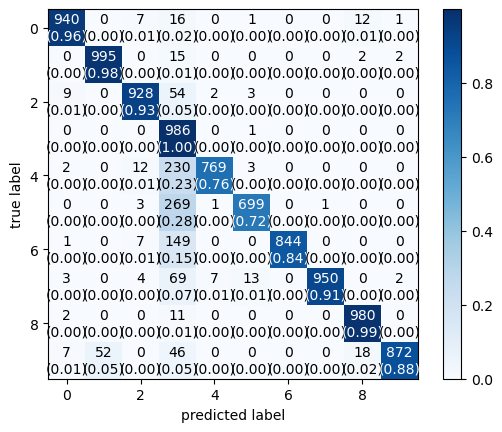

In [8]:
# Here we show the confusion matrix of the model.
print('Plotting the confusion matrix...')
cm1= confusion_matrix(Y_test_1,y_pred1)
fig1, ax1 = plot_confusion_matrix(conf_mat=cm1,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

In [9]:
# Model 2 Selection uses another model, so that we can compare the results of the two models.
selection_2 = eval(input('Select the model you want to create: 0 for MultinomialNB, 1 for SVM: '))
index_2 = random.randint(0, 3)
while index_2 == index:
  index_2 = random.randint(0, 3)

if selection_2 == 0:
  model2 = MultinomialNB()
  print('Creating Multinomial Model...')
  # Randomly select X_train2 and Y_train2 to be used in fit function
  X_train_2 = [X_train1, X_train2, X_train3, X_train4][index_2]
  Y_train_2 = [Y_train1, Y_train2, Y_train3, Y_train4][index_2]
  model2.fit(X_train_2, Y_train_2)
  print('Multinomial Model created by choosing index:', index_2, 'and using X_train', index_2+1, 'and Y_train', index_2+1, 'for fit function')
else:
  print('Creating SVM Model...')
  model2 = svm.SVC(kernel='linear', gamma='scale')
  # Randomly select X_train2 and Y_train2 to be used in fit function
  X_train_2 = [X_train1, X_train2, X_train3, X_train4][index_2]
  Y_train_2 = [Y_train1, Y_train2, Y_train3, Y_train4][index_2]
  model2.fit(X_train_2, Y_train_2)
  print('SVM Model created by choosing index:', index_2, 'and using X_train', index_2+1, 'and Y_train', index_2+1, 'for fit function')


Creating LogisticRegression Model, not advised as it takes a lot of time to fit...
SVM Model created by choosing index: 3 and using X_train 4 and Y_train 4 for fit function


In [10]:
# Again we calculate the prediction of the model and the classification report is printed.
print('Printing the classification report for the model created using X_test', index_2+1, 'and Y_test', index_2+1)
X_test_2 = [X_test1, X_test2, X_test3, X_test4][index_2]
y_pred2 = model2.predict(X_test_2)
Y_test_2 = [Y_test1, Y_test2, Y_test3, Y_test4][index_2]
print('\nClassification Report\n\n', classification_report(Y_test_2, y_pred2))

Printing the classification report for the model created using X_test 4 and Y_test 4

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       977
           1       0.99      0.99      0.99      1014
           2       0.97      0.96      0.96       996
           3       0.90      0.93      0.91       987
           4       0.97      0.97      0.97      1016
           5       0.93      0.92      0.93       973
           6       0.99      0.98      0.98      1001
           7       0.98      0.98      0.98      1048
           8       0.99      0.99      0.99       993
           9       0.99      0.99      0.99       995

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Plotting the confusion matrix


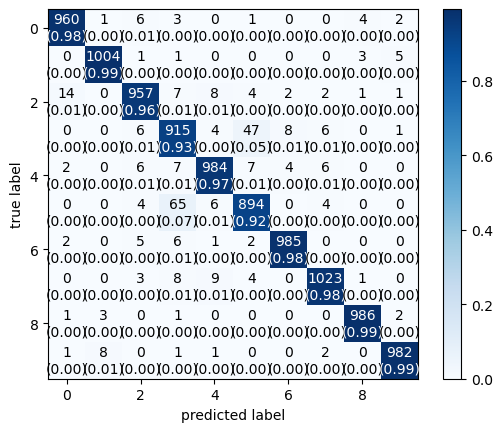

In [11]:
#Again the confusion matrix is shown for the second model chosen.
print('Plotting the confusion matrix')
cm = confusion_matrix(y_target=Y_test_2,
                      y_predicted=y_pred2,
                      binary=False)
#print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True
                                )

In [15]:
#LOAD BLINDTEST, this is the part where we load the blind test and we make the prediction of the model.

#blind_test_path = '/content/drive/MyDrive/Machine Learning/Homework 1 Dataset/HW1_datasets_public/blind_test1.csv'
blind_test_path_1 = 'blind_test1.csv'
blind_test_path_2 = 'blind_test2.csv'
print('Loading blind tests...')
X_blind, Y_blind = load_data(blind_test_path_1)
X_blind_2, Y_blind_2 = load_data(blind_test_path_2)

#Print number of samples in the blind test
print('Number of samples in blind test 1:', len(X_blind))
print('Number of samples in blind test 2:', len(X_blind_2))

print('\n\nBlind Tests:\n\n' , X_blind, X_blind_2)

Loading blind test...
Number of samples in blind test 1: 10000
Number of samples in blind test 2: 10000


Blind Tests:

 [[0.433888 0.584314 0.       ... 0.       0.       0.      ]
 [0.       3.600694 0.       ... 4.870718 0.       0.      ]
 [0.       3.47229  0.       ... 4.662583 0.       0.      ]
 ...
 [0.817364 1.809564 0.       ... 0.264881 0.       0.      ]
 [0.272708 0.       0.       ... 0.       0.       0.      ]
 [0.       2.943537 0.       ... 2.049753 0.053485 0.      ]] [[0.       0.449251 0.       ... 0.       0.       0.      ]
 [0.       0.113263 0.651891 ... 0.365902 0.802566 0.      ]
 [0.       0.152922 0.534327 ... 0.410418 0.77232  0.      ]
 ...
 [0.       0.844255 0.379134 ... 0.       0.378584 0.086209]
 [0.       0.246805 0.26778  ... 1.035557 0.       0.      ]
 [0.       0.632136 0.054585 ... 0.328051 1.167032 0.238647]]


In [13]:
print('Predicting the blind test...\n\n')
try :
    y_pred_new1= model1.predict(X_blind_2)
except :
    y_pred_new1= model1.predict(X_blind)
    
try :
    y_pred_new2= model2.predict(X_blind_2)  
except :   
    y_pred_new2= model2.predict(X_blind)  

print(y_pred_new1, y_pred_new2)

Predicting the blind test...


[3 8 8 ... 5 1 7] [3 8 8 ... 5 1 7]


In [14]:
#Saving the predictions in a csv file
print('Saving the predictions in a csv file...')
df = pd.DataFrame(y_pred_new1)
df.to_csv('blindtest1_predictions.csv', index=False)
df = pd.DataFrame(y_pred_new2)
df.to_csv('blindtest2_predictions.csv', index=False)
print('Saved.')

Saving the predictions in a csv file...
Saved.
